Exploratory Data Analysis on Dataset-Terrorism

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset with the appropriate encoding
data = pd.read_csv("C:/Users/a1582/Downloads/terrorism_dataset.csv", encoding='ISO-8859-1')

C:\Users\a1582\AppData\Local\Temp\ipykernel_1604\3642238821.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/a1582/Downloads/terrorism_dataset.csv", encoding='ISO-8859-1')


In [3]:
# Rest of the code (EDA steps, data visualization, grouping, time series analysis)

# Overview of the dataset
print(data.head())

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [4]:
# Summary statistics
print(data.describe())

            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       

In [5]:
# Check for missing values
print(data.isnull().sum())

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


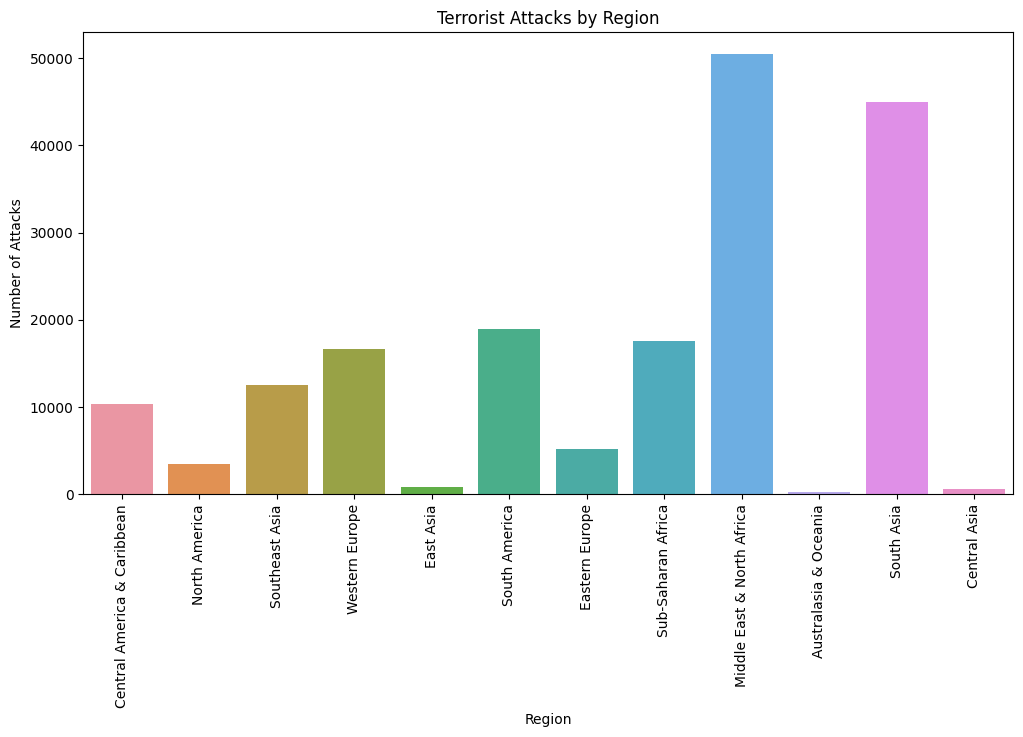

In [6]:
# Data visualization

# Bar plot of terrorist attacks by region
plt.figure(figsize=(12, 6))
sns.countplot(x='region_txt', data=data)
plt.xticks(rotation=90)
plt.title('Terrorist Attacks by Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.show()

C:\Users\a1582\AppData\Local\Temp\ipykernel_1604\3589527906.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


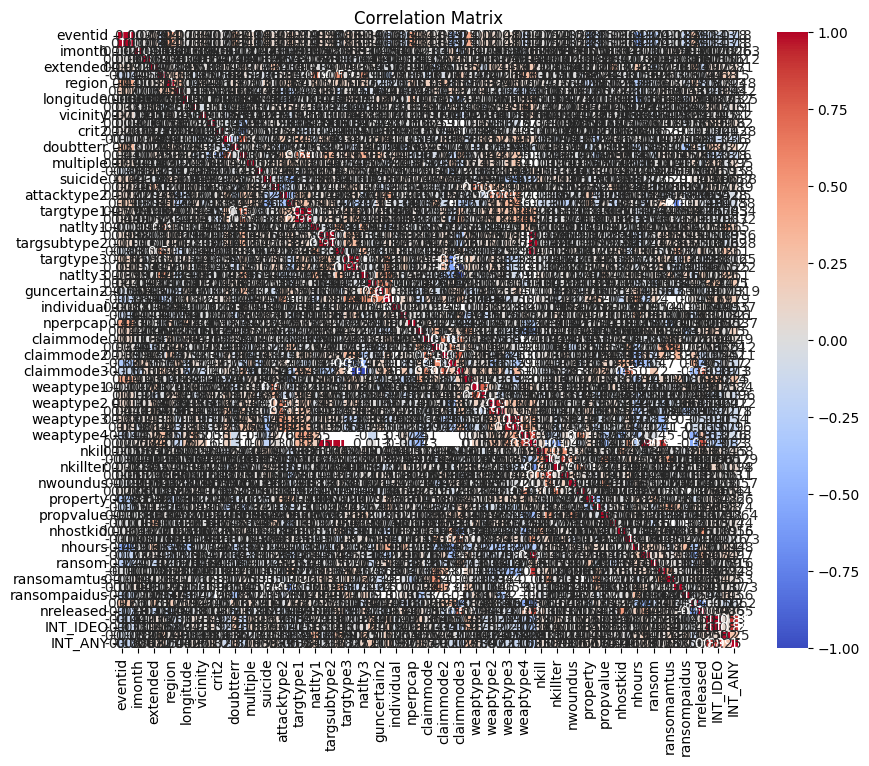

In [7]:
# Heatmap of correlation between variables
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [8]:
# Top 10 countries with the most terrorist attacks
top_countries = data['country_txt'].value_counts().head(10)
print(top_countries)

# Time series analysis

# Convert 'iyear' column to datetime format
data['iyear'] = pd.to_datetime(data['iyear'], format='%Y')

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64


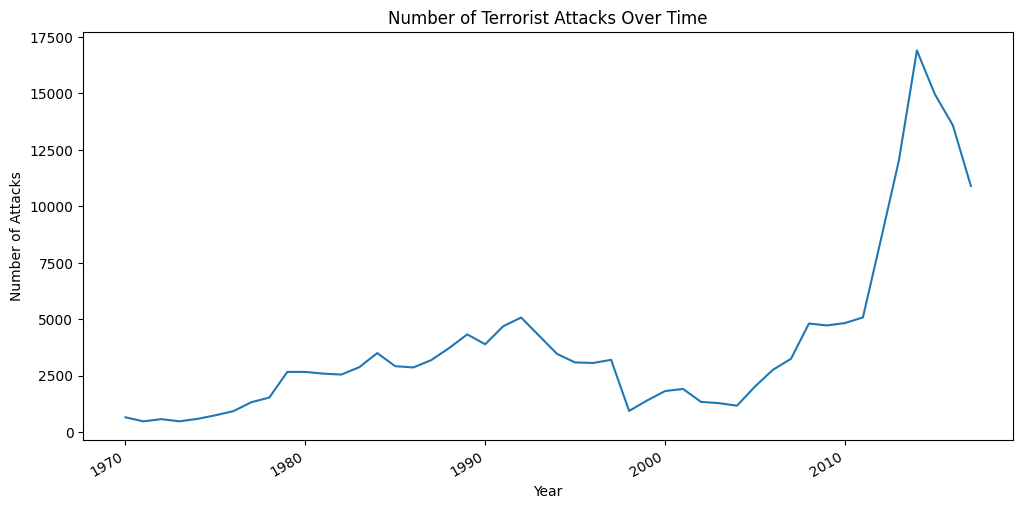

In [9]:
# Number of terrorist attacks over time
attacks_over_time = data['iyear'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
attacks_over_time.plot(kind='line')
plt.title('Number of Terrorist Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()